### daily_load

In [8]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

In [28]:
df = pd.read_excel("C:\\Users\\Ramte\\Documents\\4th year\\new\\Active Power Load - 33_11KV - Godishala Substation .xlsx")
data=df['POWER (KW)']

In [10]:
sum_val = 0
data1 = []
count = 0

# Step 2: Loop through the hourly data
for i in range(len(data)):
    sum_val += data[i]  # Accumulate sum for every 24 hours
    count += 1
    
    # When 24 hours are reached, compute the average and reset sum and count
    if count == 24:
        data1.append(sum_val / 24)  # Calculate daily average
        sum_val = 0  # Reset sum
        count = 0  # Reset counter

# Step 3: Convert daily averages to a pandas Series
daily_data = pd.Series(data1)

In [ ]:
daily_data.head()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

In [6]:
import numpy as np
from sklearn.model_selection import ParameterGrid

# Placeholder VMD function (replace with your actual VMD implementation)
def vmd_algorithm(data, alpha, tau, DC, init, tol, K):
    # Dummy modes and residual energy for illustration purposes
    modes = [np.random.randn(len(data)) for _ in range(K)]
    residual_energy = np.random.rand()  # Placeholder for actual residual energy
    return modes, residual_energy

# Evaluation function for VMD
def evaluate_vmd(alpha, tau, DC, init, tol, K, data):
    # Step 1: Run VMD with the given parameters
    modes, residual_energy = vmd_algorithm(data, alpha, tau, DC, init, tol, K)

    # Step 2: Evaluate the modes using multiple metrics

    # 1. Calculate residual energy score (lower is better)
    residual_energy_score = residual_energy
    
    # 2. Calculate orthogonality score (lower is better)
    orthogonality_score = 0
    for i in range(K):
        for j in range(i+1, K):
            orthogonality_score += np.abs(np.dot(modes[i], modes[j])) / (np.linalg.norm(modes[i]) * np.linalg.norm(modes[j]))

    # 3. Calculate spectral entropy for mode sparsity (lower is better)
    spectral_entropy_score = 0
    for mode in modes:
        psd = np.abs(np.fft.fft(mode))**2
        psd = psd / np.sum(psd)  # Normalize the power spectrum
        entropy = -np.sum(psd * np.log(psd + 1e-12))  # Add small constant to avoid log(0)
        spectral_entropy_score += entropy

    # Step 3: Combine all scores into a final score (lower is better)
    total_score = residual_energy_score + orthogonality_score + spectral_entropy_score
    
    return total_score  # Return the total score (lower score is better)

# Define the parameter grid for automatic search
param_grid = {
    'alpha': [500, 1000, 2000],  # Example values for alpha
    'tau': [0.0, 0.1],  # Noise tolerance
    'DC': [0],  # Keep DC constant (or try with and without)
    'init': [1],  # Uniform initialization
    'tol': [1e-6, 1e-7],  # Tolerance for convergence
}

# Data and number of modes K
  # Placeholder for your actual data
K = 3  # You can change the number of modes as needed

# Grid search for best parameters
grid = ParameterGrid(param_grid)

best_score = float('inf')
best_params = None

# Loop through all combinations of parameters in the grid
for params in grid:
    score = evaluate_vmd(**params, K=K, data=daily_data)  # Run VMD with these params
    
    # If this set of parameters gives a better score, update the best parameters
    if score < best_score:
        best_score = score
        best_params = params

# Print the best parameters and the corresponding score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'DC': 0, 'alpha': 2000, 'init': 1, 'tau': 0.0, 'tol': 1e-07}
Best Score: 16.590767216752678


In [7]:
alpha = best_params['alpha']
tau = best_params['tau']
DC = best_params['DC']
init = best_params['init']
tol = best_params['tol']

In [13]:
u, u_hat, omega = VMD(daily_data[1:], alpha, tau, K, DC, init, tol)

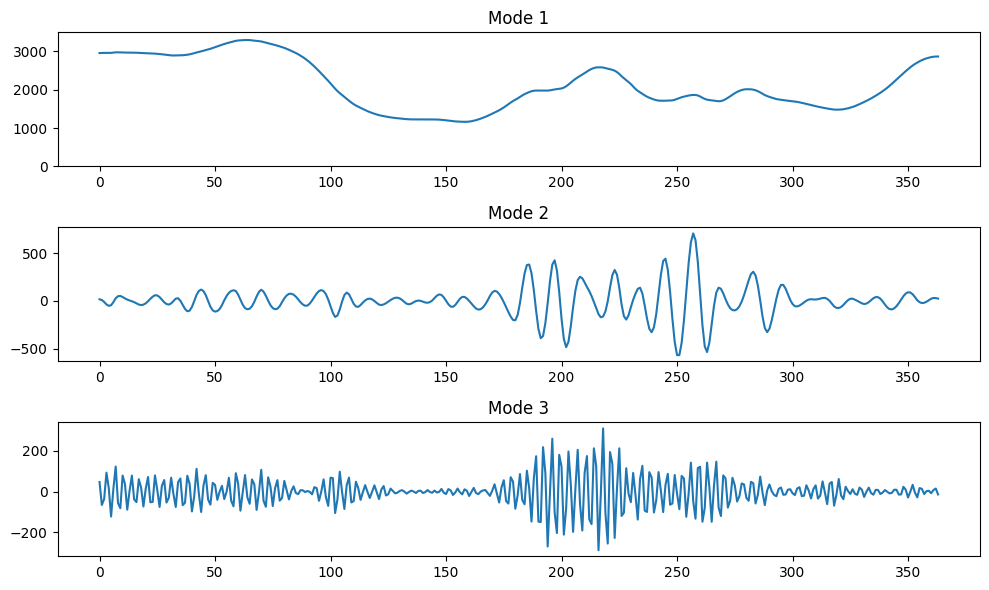

In [14]:
# Plot the decomposed modes
plt.figure(figsize=(10, 6))
for i in range(K):
    plt.subplot(K, 1, i+1)
    plt.plot(u[i, :])
    plt.title(f'Mode {i+1}')
    if (i==0):
        plt.ylim(0,3500)
plt.tight_layout()
plt.show()

In [15]:
sum_da=u[0]+u[1]+u[2]

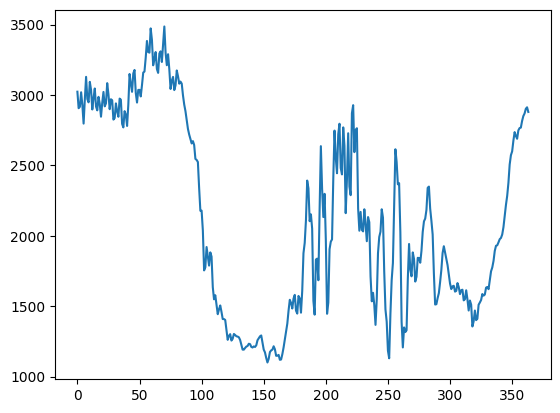

In [16]:
plt.plot(sum_da)

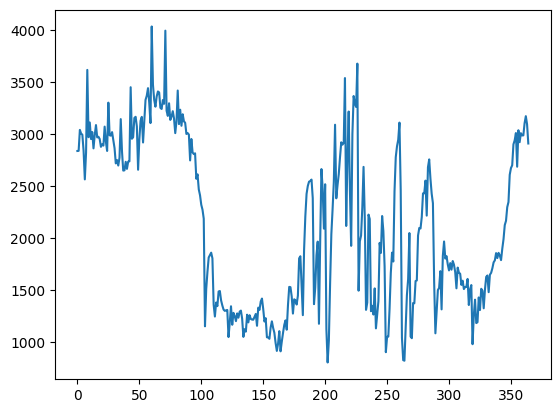

In [17]:
plt.plot(daily_data)

### hourly

In [18]:
data.head()

0    1967.388015
1    1967.388015
2    1967.388015
3    2442.607331
4    2756.205522
Name: POWER (KW), dtype: float64

In [19]:
import numpy as np
from sklearn.model_selection import ParameterGrid

# Placeholder VMD function (replace with your actual VMD implementation)
def vmd_algorithm(data, alpha, tau, DC, init, tol, K):
    # Dummy modes and residual energy for illustration purposes
    modes = [np.random.randn(len(data)) for _ in range(K)]
    residual_energy = np.random.rand()  # Placeholder for actual residual energy
    return modes, residual_energy

# Evaluation function for VMD
def evaluate_vmd(alpha, tau, DC, init, tol, K, data):
    # Step 1: Run VMD with the given parameters
    modes, residual_energy = vmd_algorithm(data, alpha, tau, DC, init, tol, K)

    # Step 2: Evaluate the modes using multiple metrics

    # 1. Calculate residual energy score (lower is better)
    residual_energy_score = residual_energy
    
    # 2. Calculate orthogonality score (lower is better)
    orthogonality_score = 0
    for i in range(K):
        for j in range(i+1, K):
            orthogonality_score += np.abs(np.dot(modes[i], modes[j])) / (np.linalg.norm(modes[i]) * np.linalg.norm(modes[j]))

    # 3. Calculate spectral entropy for mode sparsity (lower is better)
    spectral_entropy_score = 0
    for mode in modes:
        psd = np.abs(np.fft.fft(mode))**2
        psd = psd / np.sum(psd)  # Normalize the power spectrum
        entropy = -np.sum(psd * np.log(psd + 1e-12))  # Add small constant to avoid log(0)
        spectral_entropy_score += entropy

    # Step 3: Combine all scores into a final score (lower is better)
    total_score = residual_energy_score + orthogonality_score + spectral_entropy_score
    
    return total_score  # Return the total score (lower score is better)

# Define the parameter grid for automatic search
param_grid = {
    'alpha': [500, 1000, 2000],  # Example values for alpha
    'tau': [0.0, 0.1],  # Noise tolerance
    'DC': [0],  # Keep DC constant (or try with and without)
    'init': [1],  # Uniform initialization
    'tol': [1e-6, 1e-7],  # Tolerance for convergence
}

# Data and number of modes K
  # Placeholder for your actual data
K = 4  # You can change the number of modes as needed

# Grid search for best parameters
grid = ParameterGrid(param_grid)

best_score = float('inf')
best_params = None

# Loop through all combinations of parameters in the grid
for params in grid:
    score = evaluate_vmd(**params, K=K, data=data)  # Run VMD with these params
    
    # If this set of parameters gives a better score, update the best parameters
    if score < best_score:
        best_score = score
        best_params = params

# Print the best parameters and the corresponding score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'DC': 0, 'alpha': 2000, 'init': 1, 'tau': 0.0, 'tol': 1e-06}
Best Score: 34.96508160915424


In [20]:
alpha = best_params['alpha']
tau = best_params['tau']
DC = best_params['DC']
init = best_params['init']
tol = best_params['tol']

In [21]:
u, u_hat, omega = VMD(data[1:], alpha, tau, K, DC, init, tol)

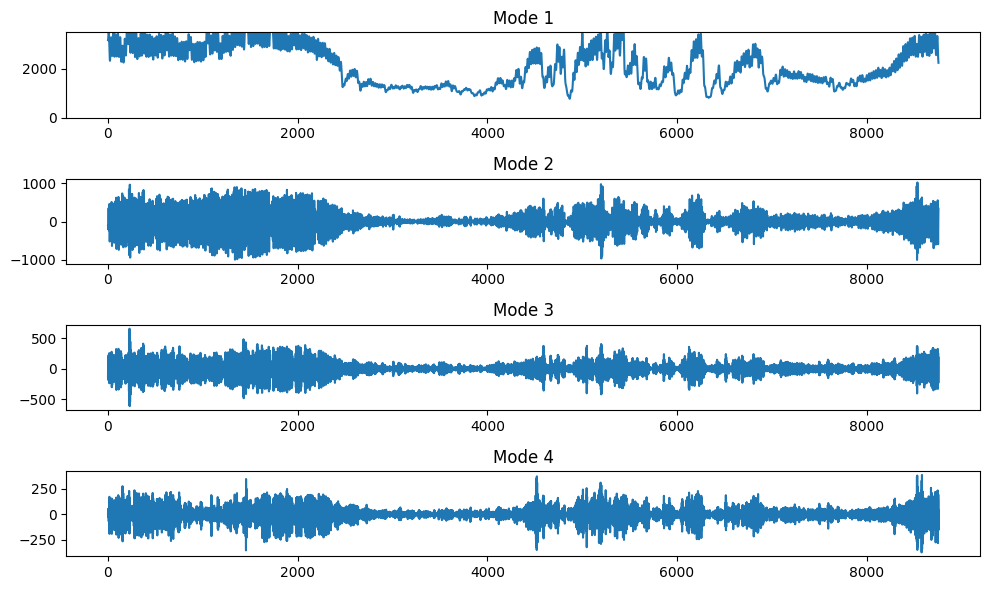

In [22]:
# Plot the decomposed modes
plt.figure(figsize=(10, 6))
for i in range(K):
    plt.subplot(K, 1, i+1)
    plt.plot(u[i, :])
    plt.title(f'Mode {i+1}')
    if (i==0):
        plt.ylim(0,3500)
plt.tight_layout()
plt.show()

In [30]:
df=pd.DataFrame(u[2])
df.to_csv('mode3_4hourly.csv',index=False)
df=pd.DataFrame(u[0])
df.to_csv('mode1_4hourly.csv',index=False)
df=pd.DataFrame(u[1])
df.to_csv('mode2_4hourly.csv',index=False)
df=pd.DataFrame(u[3])
df.to_csv('mode4_4hourly.csv',index=False)

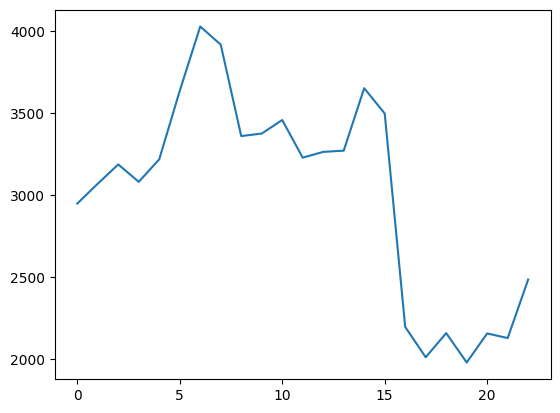

In [33]:
u_com=u[0][0:23]+u[1][0:23]+u[2][0:23]+u[3][0:23]
plt.plot(u_com)

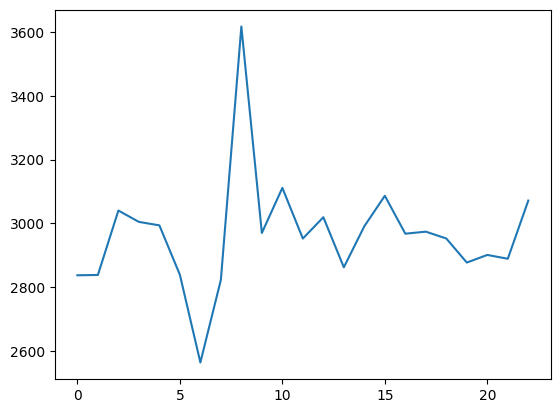

In [35]:
plt.plot(daily_data[0:23])